WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 5

---

---
## 1. Motion Detector ##

So far we had considered visual processing mostly by linear filters that act on static inputs.
In motion processing we have to deal with dynamical stimuli and nonlinear computations.

The simplest implementation of a motion detector is by multiplying the time-shifted inputs at two
spatial locations with a fixed time delay.

$$
m(t) = f(x, t-\Delta t) \cdot f(x+\Delta x, t) - f(x, t) \cdot f(x+\Delta x, t-\Delta t)
$$

**a)**
To generate inputs for the motion detector,
write a function that takes as inputs a spatial wavelength $\lambda$, a (signed) velocity $v$,
number of spatial samples $Ns$ and number of time steps $Nt$,
and returns a $Ns$ x $Nt$ matrix with values corresponding
to a sinewave with period $\lambda$ that
moves with velocity $v$, i.e., gets shifted $v$ spatial sampling
intervals per time step. (Maybe you have done this already for execise 3) 

Generate a drifting sinewave with $\lambda=20$, and $v=2$, using $Ns=Nt=50$, and
calculate the output $m(t)$ of the motion detector described above with $\Delta x=2$, $\Delta t=2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

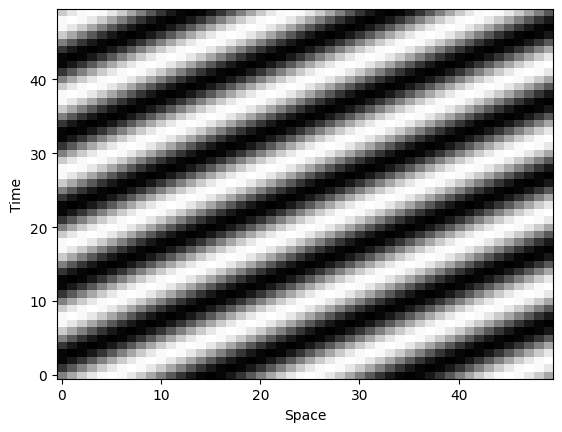

In [2]:
def stimulus(lambda_x, v_x, N_x, N_t, dt):
    matrix = np.zeros((N_t, N_x))
    for t in range(N_t):
        for x in range(N_x):
            matrix[t, x] = np.sin(2 *np.pi * (x - v_x * t) / lambda_x)
    return matrix

plt.figure()
plt.imshow(stimulus(20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

**b)**
Repeat with twice as large values for $\lambda$, for $v$, and for both $\lambda$ and $v$.
How do the results differ?

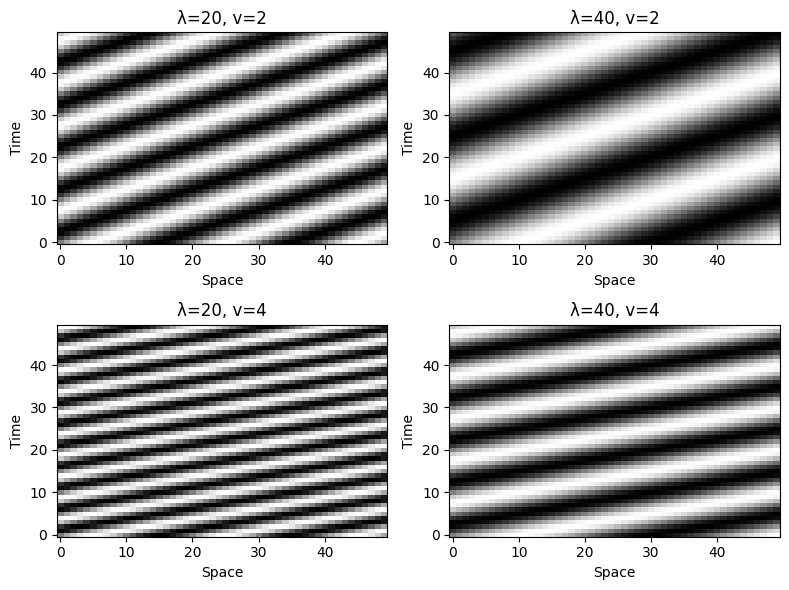

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()  # flatten 2x2 array to 1D list
params = [(20, 2), (40, 2), (20, 4), (40, 4)]

for i, ax in enumerate(axs):
    lambda_x, v_x = params[i]
    im = ax.imshow(stimulus(lambda_x, v_x, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
    ax.set_title(f'λ={lambda_x}, v={v_x}')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')

plt.tight_layout()
plt.show()


**c)** Change the wavelength of the drifting sine continuously and plot the output of the motion detector. What do you observe and does it make sense? Repeat for different velocities.

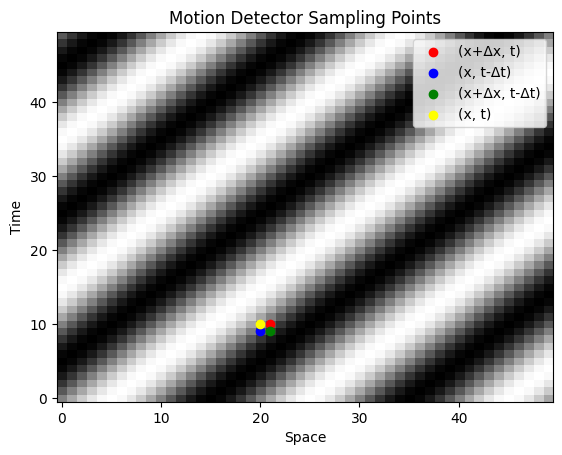

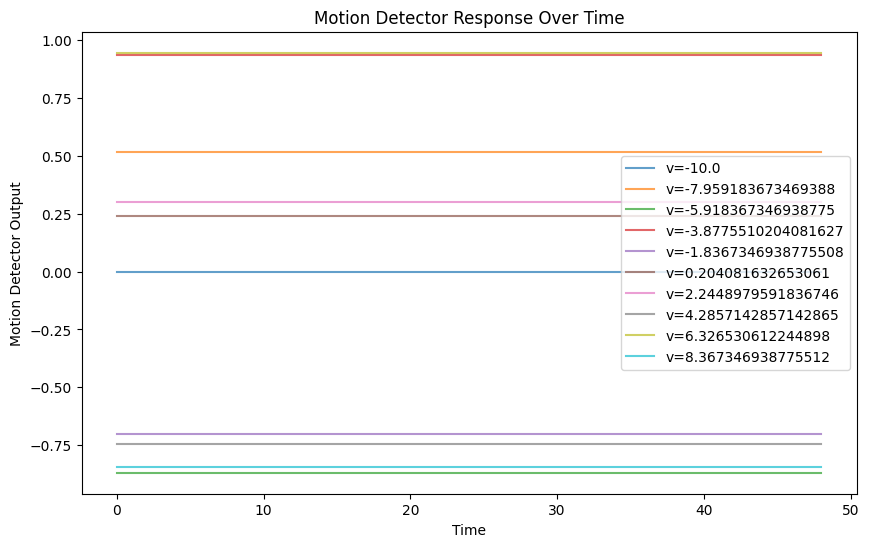

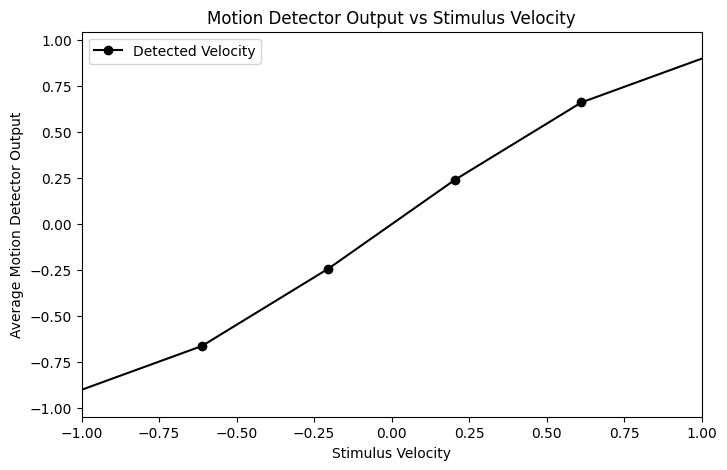

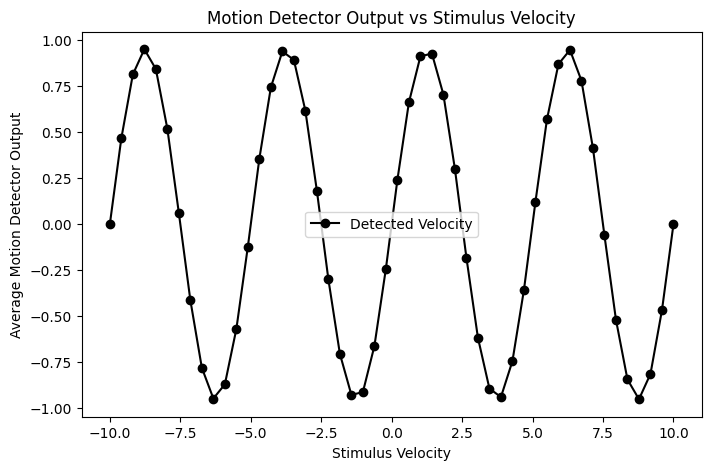

In [4]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]


velocities = np.linspace(-10, 10, 50)
velocity_detected = []

x = 20
del_x = 1
del_t = 1
t = 10

plt.figure()
plt.imshow(stimulus(20, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus(5, v, 50, 50, 0.1)

    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    if i % 5 == 0:
        plt.plot(motion_values, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity')
# plt.plot(velocities, np.abs(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.xlim(-1,1)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity')
# plt.plot(velocities, np.abs(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()



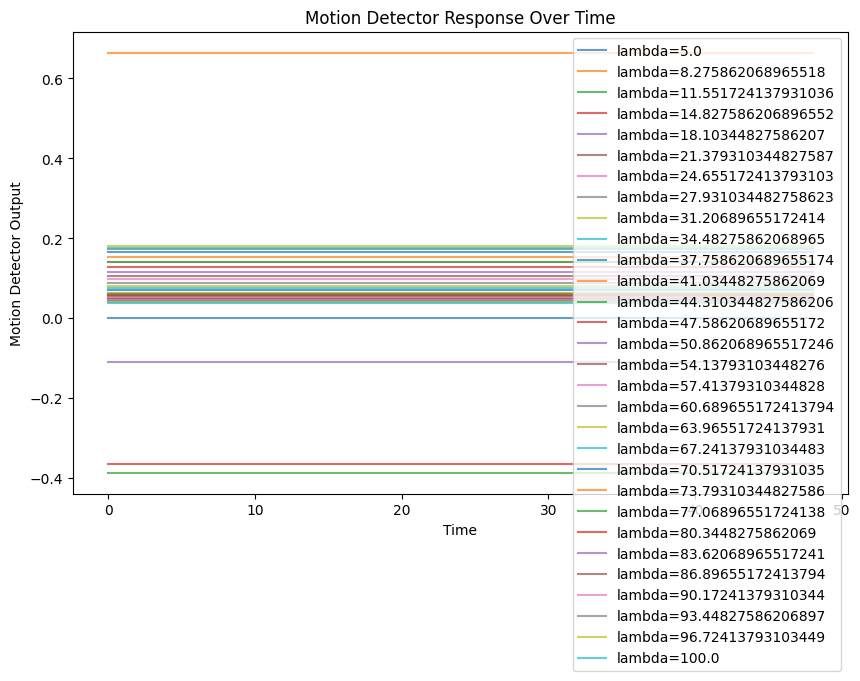

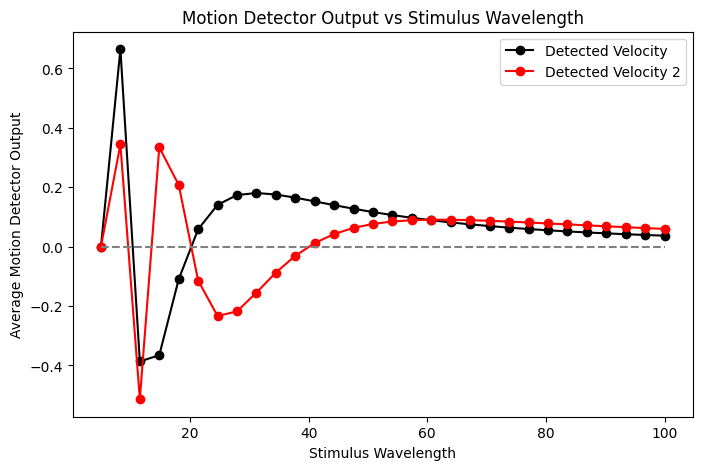

In [5]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]


lambdas = np.linspace(5, 100, 30)

velocity_detected = []
velocity_detected2 = []

x = 20
del_x = 1
del_t = 1

plt.figure(figsize=(10, 6))
for lambda_x in lambdas:
    responses = []
    stimulus_matrix = stimulus(lambda_x, 10, 50, 50, 0.1)
    stimulus_matrix2 = stimulus(lambda_x, 20, 50, 50, 0.1)
    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    motion_values2 = [motion(t, stimulus_matrix2, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected2.append(np.mean(motion_values2))
    plt.plot(motion_values, label=f'lambda={lambda_x}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(lambdas, velocity_detected, marker='o', color='k', label='Detected Velocity')
plt.plot(lambdas, velocity_detected2, marker='o', color = 'r', label='Detected Velocity 2')
plt.hlines(0, lambdas[0], lambdas[-1], colors='gray', linestyles='dashed')
plt.xlabel('Stimulus Wavelength')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Wavelength')
plt.legend()
plt.show()


**c)** Change the wavelength of the drifting sine continuously and plot the output of the motion detector. What do you observe and does it make sense? Repeat for different velocities.

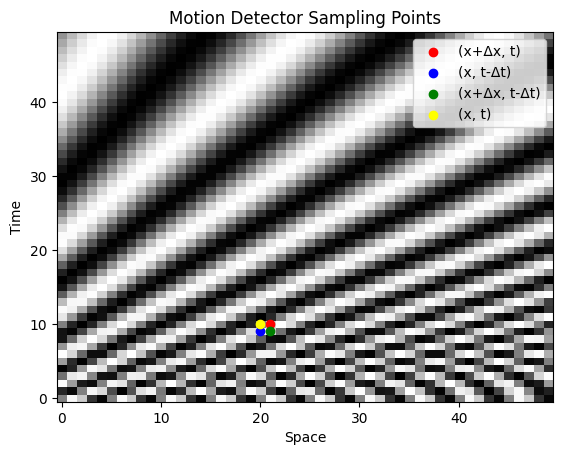

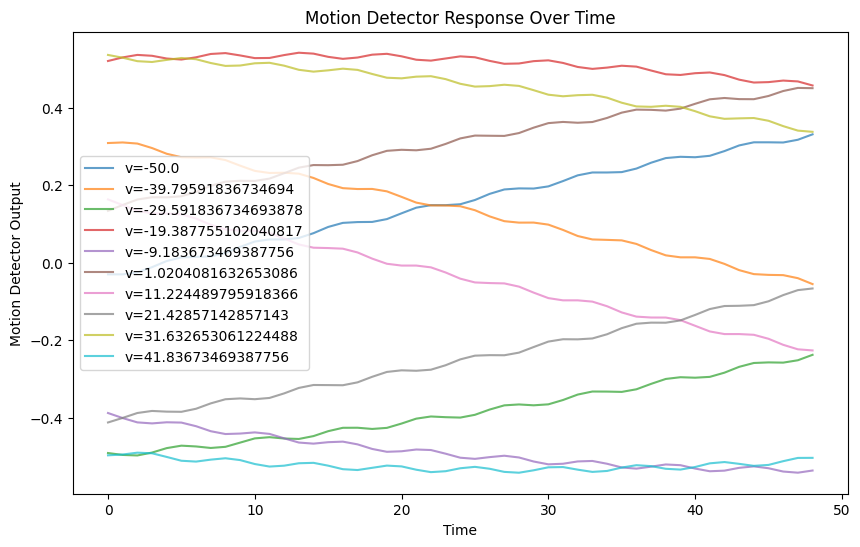

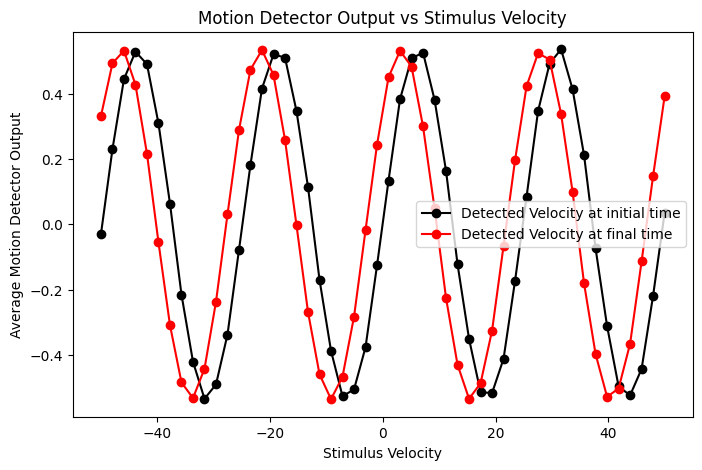

In [6]:
def stimulus_change(lambda_x_i, lambda_x_f, v_x, N_x, N_t, dt):
    matrix = np.zeros((N_t, N_x))
    for t in range(N_t):
        lambda_now = lambda_x_i + (lambda_x_f - lambda_x_i) * (t / N_t)
        for x in range(N_x):
            matrix[t, x] = np.sin(2 *np.pi * (x - v_x * t) / lambda_now)
    return matrix

# plt.figure()
# plt.imshow(stimulus_change(5, 20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
# plt.xlabel('Space')
# plt.ylabel('Time')
# plt.show()


velocities = np.linspace(-50, 50, 50)
velocity_detected = []
velocity_detected2 = []

x = 20
del_x = 1
del_t = 1
t = 10

plt.figure()
plt.imshow(stimulus_change(5, 20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus_change(5, 20, v, 50, 50, 0.1)
    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(motion_values[0])
    velocity_detected2.append(motion_values[-1])

    if i % 5 == 0:
        plt.plot(motion_values, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity at initial time')
plt.plot(velocities, np.array(velocity_detected2), marker = 'o', color='r', label='Detected Velocity at final time')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()



**d)**
What is the problem with this simple motion detector?
How could you modify it to get a "better" motion detector?

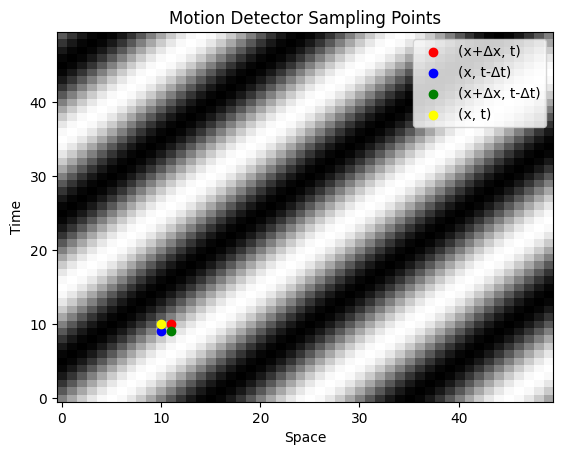

C:\Users\Dell\AppData\Local\Temp\ipykernel_3276\1388634005.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


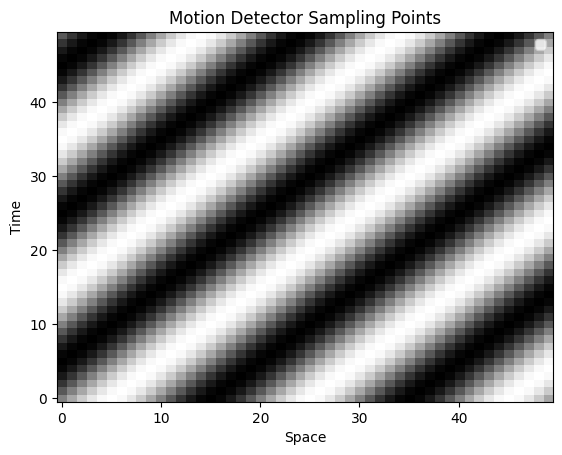

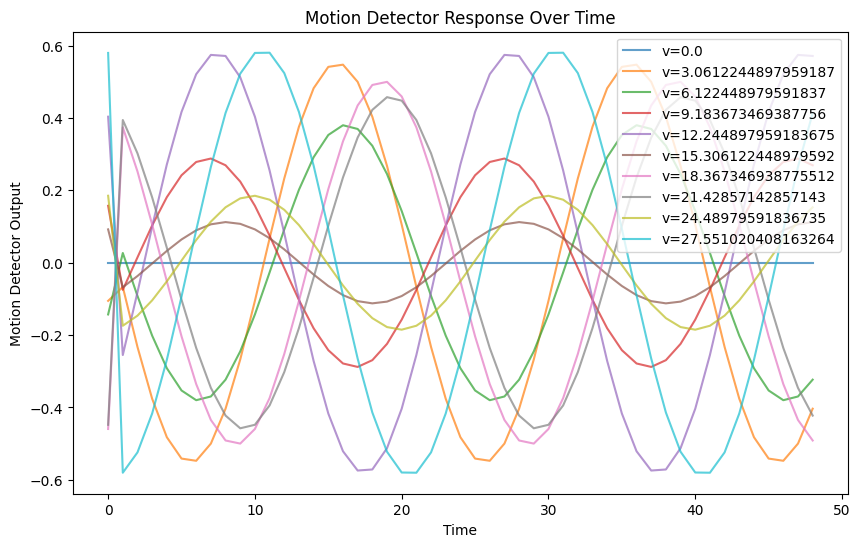

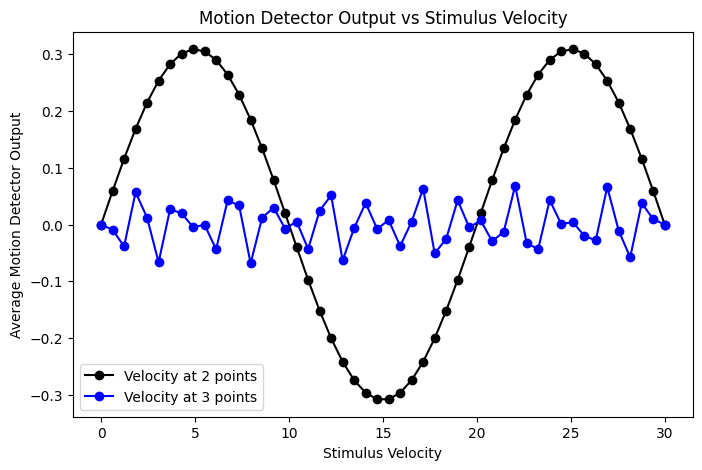

In [12]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]

def motion_3p(t, stimulus_matrix, x, del_x, del_t1, del_t2):
    rightward = stimulus_matrix[x - del_x, t - del_t2 - del_t1]*stimulus_matrix[x, t - del_t1]*stimulus_matrix[x + del_x, t]
    leftward = stimulus_matrix[x - del_x, t]*stimulus_matrix[x, t - del_t2]*stimulus_matrix[x + del_x, t - del_t2 - del_t1]
    return rightward - leftward

velocities = np.linspace(0, 30, 50)
velocity_detected = []
velocity_detected2 = []

x = 10
del_x = 1
del_t = 1
del_x2 = 2
del_t2 = 1
t = 10
lambda_x = 20

plt.figure()
plt.imshow(stimulus(lambda_x, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()


plt.figure()
plt.imshow(stimulus(lambda_x, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')

plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus(lambda_x, v, 50, 50, 0.1)
    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    motion_values2 = [motion_3p(t, stimulus_matrix, x, del_x, del_t, del_t2) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    velocity_detected2.append(np.mean(motion_values2))
    if i % 5 == 0:
        plt.plot(motion_values2, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Velocity at 2 points')
plt.plot(velocities, velocity_detected2, marker='o', color='b', label='Velocity at 3 points')
# plt.plot(velocities, np.abs(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()



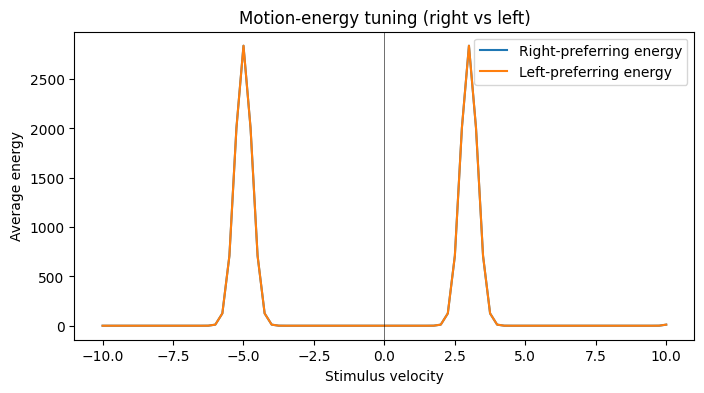

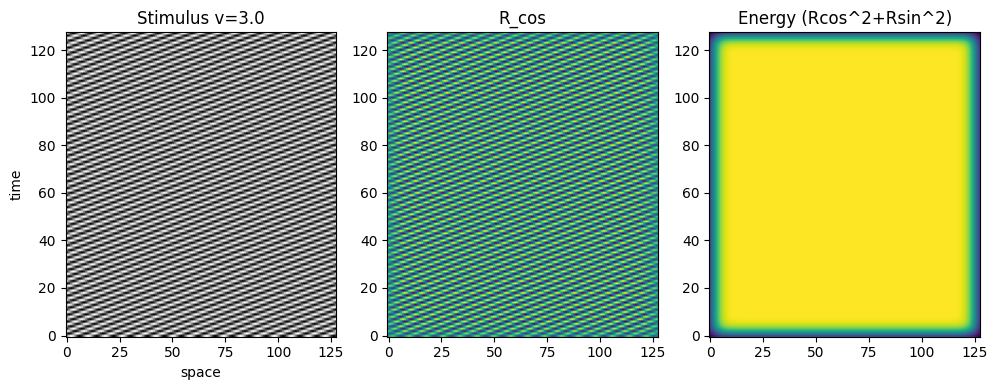

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# --------------------------
# 1) stimulus: space x time
# --------------------------
def make_drifting_grating(lambda_x, v_x, N_x, N_t, dx=1.0, dt=1.0):
    """Return stimulus as array shape (N_t, N_x): time rows, space columns."""
    xs = np.arange(N_x) * dx
    ts = np.arange(N_t) * dt
    # S[t,x] = sin(2π * (x - v*t) / lambda)
    S = np.empty((N_t, N_x), dtype=float)
    for ti, t in enumerate(ts):
        S[ti, :] = np.sin(2*np.pi * (xs - v_x * t) / lambda_x)
    # optional normalization
    S = (S - S.mean()) / S.std()
    return S

# --------------------------
# 2) space-time Gabor filter
# --------------------------
def gabor_spacetime(N_t, N_x, sigma_t, sigma_x, k_t, k_x, phase=0.0, dt=1.0, dx=1.0):
    """
    Build a space-time (t,x) Gabor: Gaussian envelope * cosine(2π(k_x x + k_t t) + phase)
    Returns array shape (N_t, N_x) with center at indices (N_t//2, N_x//2).
    k_x and k_t are spatial and temporal frequencies in cycles per unit (1/dx, 1/dt).
    """
    t_coords = (np.arange(N_t) - N_t//2) * dt
    x_coords = (np.arange(N_x) - N_x//2) * dx
    T, X = np.meshgrid(t_coords, x_coords, indexing='ij')  # shape (N_t, N_x)
    gauss = np.exp(-0.5 * (T**2 / sigma_t**2 + X**2 / sigma_x**2))
    carrier = np.cos(2*np.pi*(k_x * X + k_t * T) + phase)
    return gauss * carrier

# --------------------------
# 3) motion-energy pipeline
# --------------------------
def motion_energy_response(stimulus, kx, kt, sigma_x=4.0, sigma_t=3.0, nphase=2):
    """
    stimulus: (N_t, N_x)
    (kx, kt): spatial and temporal frequency (cycles per unit)
              positive kx -> right-preferring (phase travels left->right)
    Returns energy map E (same shape as stimulus), plus Rcos, Rsin.
    """
    N_t, N_x = stimulus.shape
    # build filters sized reasonably relative to sigmas
    Ft = int(np.ceil(6 * sigma_t))  # half-extent
    Fx = int(np.ceil(6 * sigma_x))
    filt_t = 2 * Ft + 1
    filt_x = 2 * Fx + 1

    G_cos = gabor_spacetime(filt_t, filt_x, sigma_t, sigma_x, kt, kx, phase=0.0)
    G_sin = gabor_spacetime(filt_t, filt_x, sigma_t, sigma_x, kt, kx, phase=np.pi/2)

    # convolution: use fftconvolve and keep 'same' shape
    R_cos = fftconvolve(stimulus, G_cos, mode='same')
    R_sin = fftconvolve(stimulus, G_sin, mode='same')
    E = R_cos**2 + R_sin**2
    return E, R_cos, R_sin

# --------------------------
# 4) experiment: velocity tuning
# --------------------------
def velocity_tuning(lambda_x=10.0, velocities=None, N_x=128, N_t=128, dx=1.0, dt=1.0,
                    sigma_x=4.0, sigma_t=3.0, kx0=None):
    """
    Evaluate energy tuned to a 'preferred' velocity v_pref by constructing kt = -v_pref * kx
    Then measure energy for stimuli drifting at many velocities.
    """
    if velocities is None:
        velocities = np.linspace(-12, 12, 61)
    if kx0 is None:
        # choose a spatial frequency (cycles per unit) relative to lambda_x
        kx0 = 1.0 / lambda_x

    # pick preferred velocity (choose kt so that v_pref = -kt/kx)
    v_pref = 3.0  # choose a reference preferred speed for the filter
    kt0 = -v_pref * kx0

    avg_energy = []
    avg_energy_left = []
    avg_energy_right = []

    for v in velocities:
        S = make_drifting_grating(lambda_x, v, N_x, N_t, dx=dx, dt=dt)  # shape (N_t, N_x)

        # Right-preferring filter (kx positive)
        E_r, _, _ = motion_energy_response(S, kx0, kt0, sigma_x=sigma_x, sigma_t=sigma_t)
        # Left-preferring filter: flip sign of kx (equivalently kt sign if you want)
        E_l, _, _ = motion_energy_response(S, -kx0, -kt0, sigma_x=sigma_x, sigma_t=sigma_t)

        # summarize energy: average over time and space (avoid edges)
        trim = 8
        block = E_r[trim:-trim, trim:-trim]
        block_l = E_l[trim:-trim, trim:-trim]
        avg_energy.append(block.mean())
        avg_energy_right.append(block.mean())
        avg_energy_left.append(block_l.mean())

    return velocities, np.array(avg_energy_right), np.array(avg_energy_left)

# --------------------------
# 5) run and plot
# --------------------------
# parameters (tweak to taste)
lambda_x = 8.0
N_x = 128
N_t = 128
dx = 1.0
dt = 1.0
sigma_x = 4.0
sigma_t = 3.0

velocities = np.linspace(-10, 10, 81)
vel, E_right, E_left = velocity_tuning(lambda_x=lambda_x, velocities=velocities,
                                       N_x=N_x, N_t=N_t, dx=dx, dt=dt,
                                       sigma_x=sigma_x, sigma_t=sigma_t)

plt.figure(figsize=(8,4))
plt.plot(vel, E_right, label='Right-preferring energy', color='C0')
plt.plot(vel, E_left, label='Left-preferring energy', color='C1')
plt.axvline(0, color='k', lw=0.4)
plt.xlabel('Stimulus velocity')
plt.ylabel('Average energy')
plt.title('Motion-energy tuning (right vs left)')
plt.legend()
plt.show()

# show an example stimulus and its energy map for a chosen velocity
vtest = 3.0
S = make_drifting_grating(lambda_x, vtest, N_x, N_t, dx=dx, dt=dt)
E_r, Rcos, Rsin = motion_energy_response(S, 1.0/lambda_x, -3.0*(1.0/lambda_x),
                                        sigma_x=sigma_x, sigma_t=sigma_t)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(S, aspect='auto', origin='lower', cmap='gray')
plt.title(f'Stimulus v={vtest}')
plt.xlabel('space'); plt.ylabel('time')
plt.subplot(1,3,2)
plt.imshow(Rcos, aspect='auto', origin='lower')
plt.title('R_cos')
plt.subplot(1,3,3)
plt.imshow(E_r, aspect='auto', origin='lower')
plt.title('Energy (Rcos^2+Rsin^2)')
plt.tight_layout()
plt.show()
